In [11]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa

In [12]:
# Load audio file
audio_file = 'chopin.wav'
y, sr = librosa.load(audio_file)

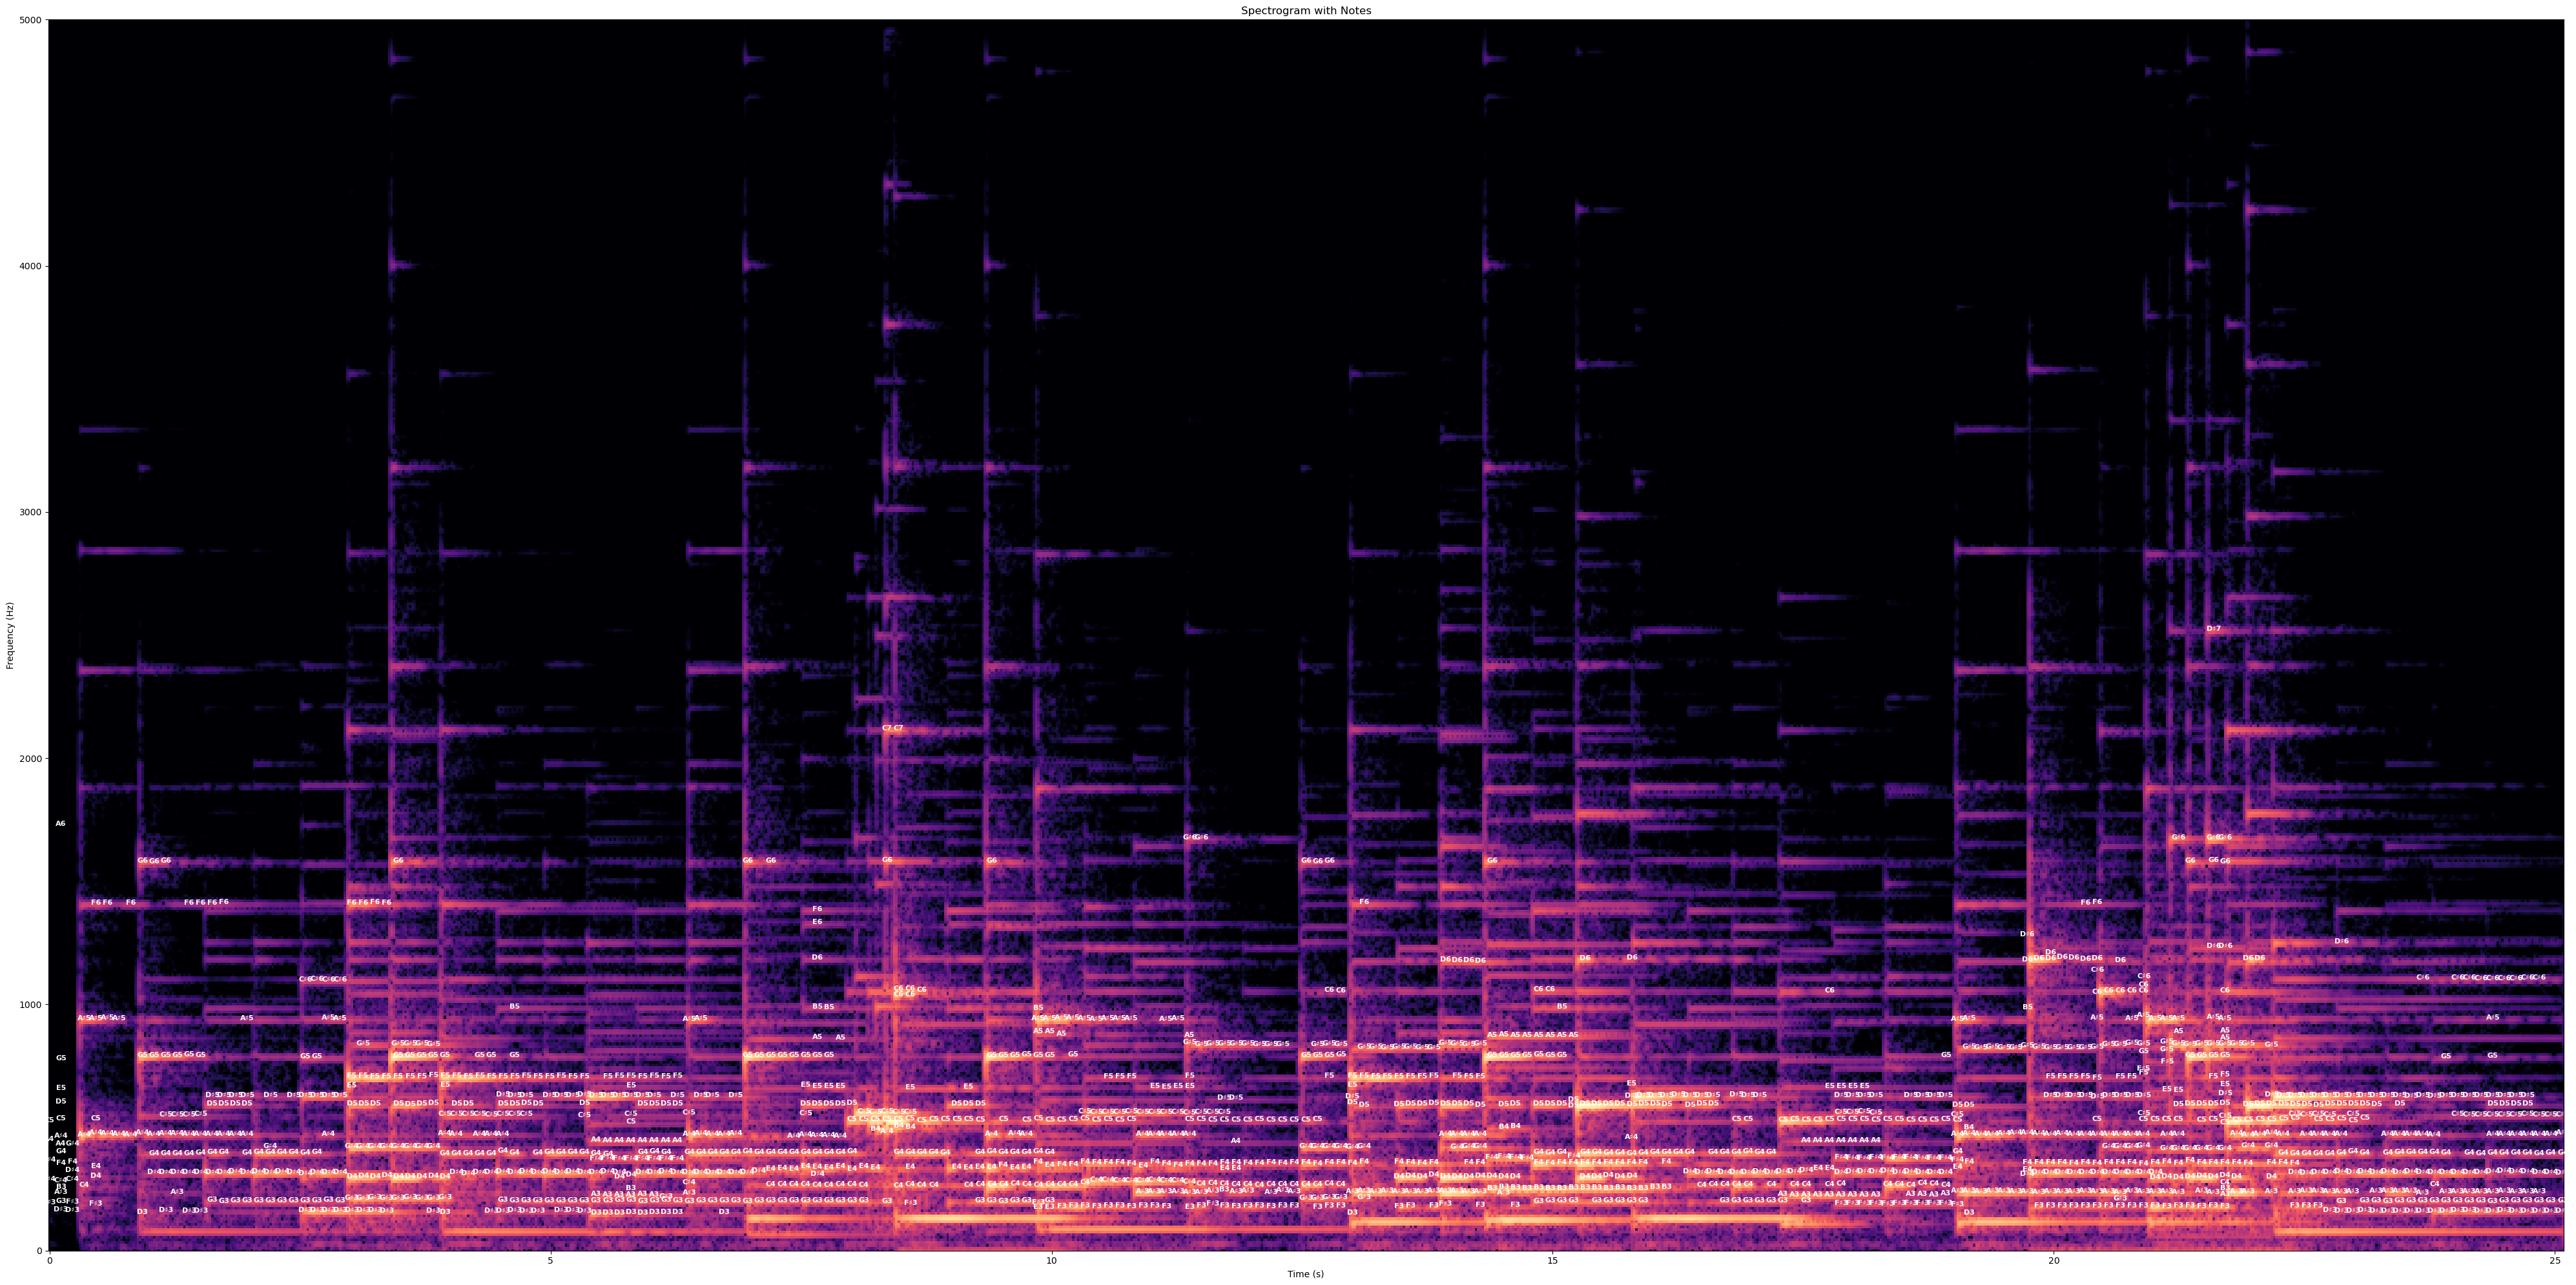

In [13]:
# Compute spectrogram
D = np.abs(librosa.stft(y))

# Convert magnitude spectrogram to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Convert pitches to notes
def freq_to_note(frequency):
    note_num = 12 * (np.log2(frequency) - np.log2(440)) + 69
    return int(round(note_num))  # MIDI note number

# Overlay notes on spectrogram
plt.figure(figsize=(40, 20))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

for frame in range(0, pitches.shape[1], 5):  # Skip some frames to reduce clutter
    for freq, magnitude in zip(pitches[:, frame], magnitudes[:, frame]):
        if np.isfinite(freq) and freq > 0:  # Check if frequency is valid and positive
            if freq <= 6000:  # Cut off frequencies above 6000 Hz
                note = freq_to_note(freq)
                plt.text(frame * 512 / sr, freq, librosa.midi_to_note(note), ha='center', fontsize=8, color='white', fontweight='bold')

# Set y-axis limit to 6000 Hz
plt.ylim(0, 5000)

# plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Notes')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

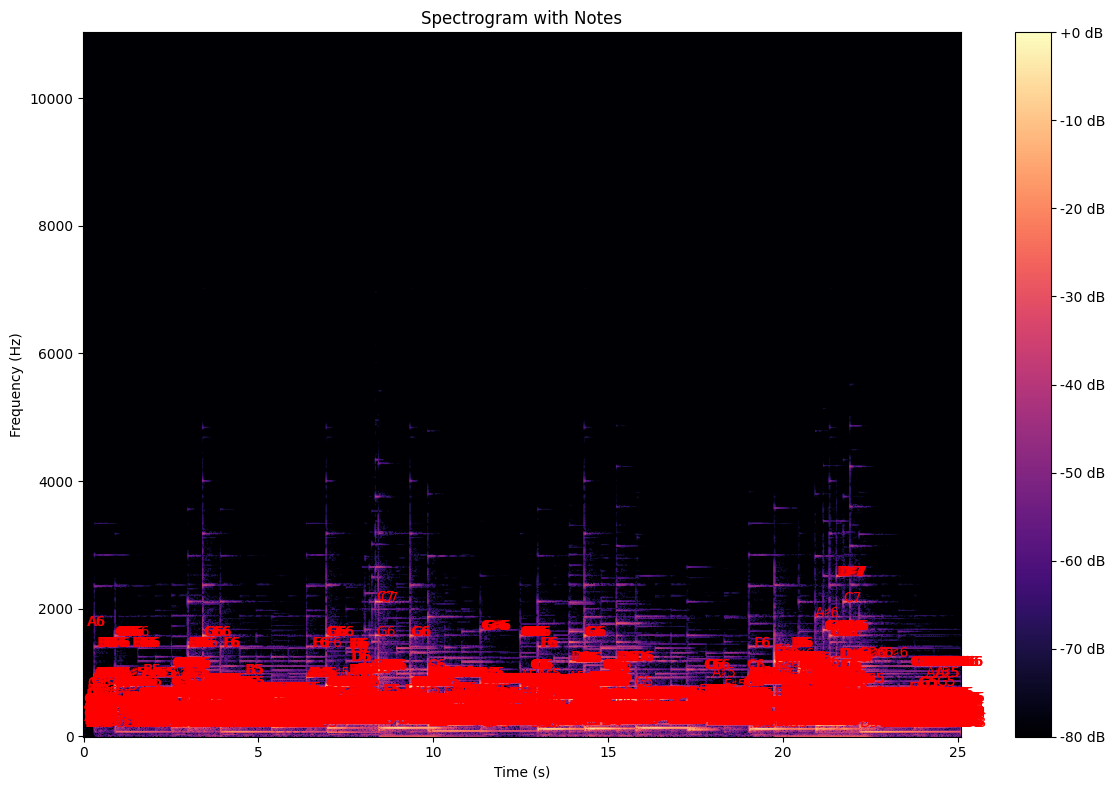

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa

# Load audio file
audio_file = 'chopin.wav'
y, sr = librosa.load(audio_file)

# Compute spectrogram
D = np.abs(librosa.stft(y))

# Convert magnitude spectrogram to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Convert pitches to notes
def freq_to_note(frequency):
    note_num = 12 * (np.log2(frequency) - np.log2(440)) + 69
    return int(round(note_num))  # MIDI note number

# Overlay notes on spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

for frame in range(pitches.shape[1]):
    for freq, magnitude in zip(pitches[:, frame], magnitudes[:, frame]):
        if np.isfinite(freq) and freq > 0:  # Check if frequency is valid and positive
            note = freq_to_note(freq)
            plt.text(frame * 512 / sr, freq, librosa.midi_to_note(note), color='red')

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Notes')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

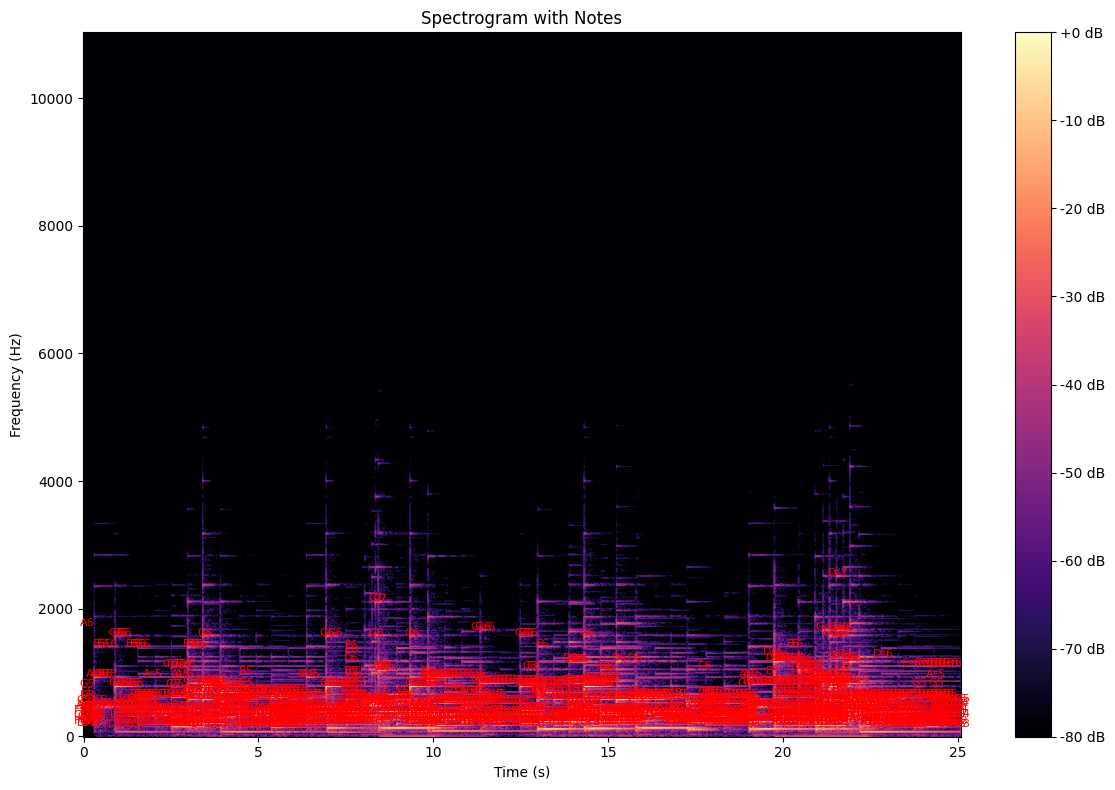

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa

# Load audio file
audio_file = 'chopin.wav'
y, sr = librosa.load(audio_file)

# Compute spectrogram
D = np.abs(librosa.stft(y))

# Convert magnitude spectrogram to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Compute pitches
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Convert pitches to notes
def freq_to_note(frequency):
    note_num = 12 * (np.log2(frequency) - np.log2(440)) + 69
    return int(round(note_num))  # MIDI note number

# Overlay notes on spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz')

for frame in range(0, pitches.shape[1], 5):  # Skip some frames to reduce clutter
    for freq, magnitude in zip(pitches[:, frame], magnitudes[:, frame]):
        if np.isfinite(freq) and freq > 0:  # Check if frequency is valid and positive
            note = freq_to_note(freq)
            plt.text(frame * 512 / sr, freq, librosa.midi_to_note(note), ha='center', fontsize=8, color='red')

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Notes')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()